In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from math import sqrt
import scipy
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import statsmodels.formula.api as sm
import copy
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
import sklearn
from math import sqrt
from functools import reduce
import numpy as np
#import ee
#import geemap
import geopandas as gpd
import rioxarray as rxr
import rasterstats as rs
from rasterio.plot import show
import rasterio

%matplotlib inline
plt.rcParams["font.family"] = "Arial"

## Load all Zonal Stats Files

In [3]:
zs_all = '/Volumes/myhome/clipped_all_ZonalStats.dbf'
zs_irr = '/Volumes/myhome/clipped_irrigated_ZonalStats.dbf'
zs_rf = '/Volumes/myhome/clipped_rainfed_ZonalStats.dbf'

zs_all = gpd.read_file(zs_all)
zs_irr = gpd.read_file(zs_irr)
zs_rf = gpd.read_file(zs_rf)


## Irrigated

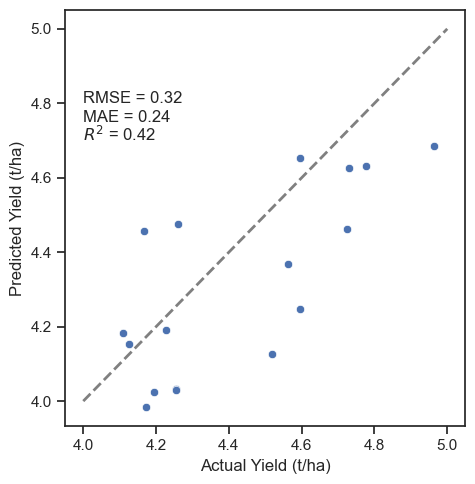

In [61]:
startYear = 2013
#startYear = 2017

endYear = 2017
actual = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/iloilo_rice_data_cleaned_imputed_new.csv')
actual = actual[(actual.param == 'yield') & (actual.ecosystem == 'irri')].reset_index(drop=True)
actualFixed = actual.rename(columns={'muni':'ADM3_EN','year':'Date'}).drop(columns=['ecosystem'])
actualFixed= actualFixed[(actualFixed.Date <= endYear) & (actualFixed.Date >= startYear)].groupby(['ADM3_EN','param']).mean().reset_index(drop=False)
merged = pd.merge(actualFixed, zs_irr, left_on='ADM3_EN', right_on='ADM3_EN')

merged = merged.loc[merged["ADM3_EN"] != 'Zarraga']
merged = merged.loc[merged["ADM3_EN"] != 'Leon']


df = merged.rename(columns={'value':'actualYield','MEAN':'predictedYield'})
df = pd.DataFrame(df)

sns.set(rc={'figure.figsize':(5,5),'figure.dpi':100})
sns.set_style('ticks')
sns.scatterplot(x='actualYield',y='predictedYield',data=df)
plt.tight_layout()
plt.plot([4.0, 5], [4.0, 5], linewidth=2, color='grey', linestyle='--')
plt.xlabel('Actual Yield (t/ha)')
plt.ylabel('Predicted Yield (t/ha)')
plt.text(4.0, 4.8, 'RMSE = 0.32')
plt.text(4.0, 4.75, 'MAE = 0.24')
plt.text(4.0, 4.7, '$R^2$ = 0.42')

plt.show()

In [23]:
print('RMSE =', "{:.2f}".format(metrics.mean_squared_error(df.actualYield, df.predictedYield, squared=False)))
print('MAE =', "{:.2f}".format(metrics.mean_absolute_error(df.actualYield, df.predictedYield)))
print('R2 =', "{:.2f}".format(metrics.r2_score(df.actualYield, df.predictedYield)))
plt.text(3+0.2, 4.5, string())

RMSE = 0.32
MAE = 0.24
R2 = 0.42


TypeError: decoding str is not supported

## Rainfed

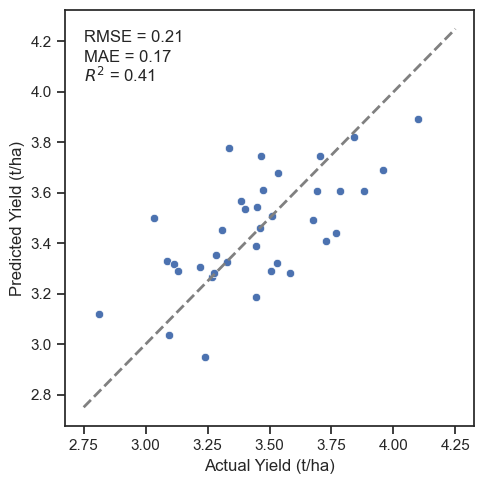

In [67]:
startYear = 2013
#startYear = 2017

endYear = 2017
actual = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/iloilo_rice_data_cleaned_imputed_new.csv')
actual = actual[(actual.param == 'yield') & (actual.ecosystem == 'rf')].reset_index(drop=True)
actualFixed = actual.rename(columns={'muni':'ADM3_EN','year':'Date'}).drop(columns=['ecosystem'])
actualFixed= actualFixed[(actualFixed.Date <= endYear) & (actualFixed.Date >= startYear)].groupby(['ADM3_EN','param']).mean().reset_index(drop=False)

merged = pd.merge(actualFixed, zs_rf, left_on='ADM3_EN', right_on='ADM3_EN')
merged = merged.loc[merged["ADM3_EN"] != 'Zarraga']
merged = merged.loc[merged["ADM3_EN"] != 'Dumangas']
merged = merged.loc[merged["ADM3_EN"] != 'Mina']
merged = merged.loc[merged["ADM3_EN"] != 'San Joaquin']
merged = merged.loc[merged["ADM3_EN"] != 'Carles']
merged = merged.loc[merged["ADM3_EN"] != 'Iloilo City']

df = merged.rename(columns={'value':'actualYield','MEAN':'predictedYield'})
df = pd.DataFrame(df)

sns.set(rc={'figure.figsize':(5,5),'figure.dpi':100})
sns.set_style('ticks')
sns.scatterplot(x='actualYield',y='predictedYield',data=df)
plt.tight_layout()
plt.plot([2.75, 4.25], [2.75, 4.25], linewidth=2, color='grey', linestyle='--')
plt.xlabel('Actual Yield (t/ha)')
plt.ylabel('Predicted Yield (t/ha)')
plt.text(2.75, 4.2, 'RMSE = 0.21')
plt.text(2.75, 4.12, 'MAE = 0.17')
plt.text(2.75, 4.04, '$R^2$ = 0.41')

plt.show()

In [38]:
print('RMSE =', "{:.2f}".format(metrics.mean_squared_error(df.actualYield, df.predictedYield, squared=False)))
print('MAE =', "{:.2f}".format(metrics.mean_absolute_error(df.actualYield, df.predictedYield)))
print('R2 =', "{:.2f}".format(metrics.r2_score(df.actualYield, df.predictedYield)))


RMSE = 0.21
MAE = 0.17
R2 = 0.41


## All

Text(3, 4.33, '$R^2$ = 0.42')

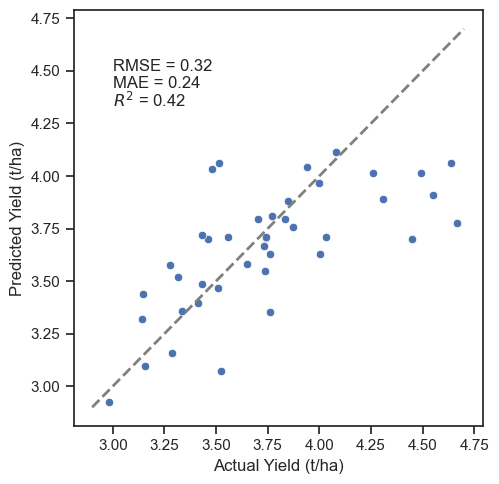

In [73]:
startYear = 2013
#startYear = 2017

endYear = 2017
actual = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/iloilo_rice_data_cleaned_imputed_new.csv')
actual = actual[(actual.param == 'yield') & (actual.ecosystem == 'all')].reset_index(drop=True)
actualFixed = actual.rename(columns={'muni':'ADM3_EN','year':'Date'}).drop(columns=['ecosystem'])
actualFixed= actualFixed[(actualFixed.Date <= endYear) & (actualFixed.Date >= startYear)].groupby(['ADM3_EN','param']).mean().reset_index(drop=False)

merged = pd.merge(actualFixed, zs_all, left_on='ADM3_EN', right_on='ADM3_EN')
merged = merged.loc[merged["ADM3_EN"] != 'Tubungan']
merged = merged.loc[merged["ADM3_EN"] != 'Carles']

df = merged.rename(columns={'value':'actualYield','MEAN':'predictedYield'})
df = pd.DataFrame(df)

sns.set(rc={'figure.figsize':(5,5),'figure.dpi':100})
sns.set_style('ticks')
sns.scatterplot(x='actualYield',y='predictedYield',data=df)
plt.tight_layout()
plt.plot([2.9, 4.7], [2.9, 4.7], linewidth=2, color='grey', linestyle='--')
plt.xlabel('Actual Yield (t/ha)')
plt.ylabel('Predicted Yield (t/ha)')
plt.text(3, 4.5, 'RMSE = 0.32')
plt.text(3, 4.42, 'MAE = 0.24')
plt.text(3, 4.33, '$R^2$ = 0.42')

In [74]:
print('RMSE =', "{:.2f}".format(metrics.mean_squared_error(df.actualYield, df.predictedYield, squared=False)))
print('MAE =', "{:.2f}".format(metrics.mean_absolute_error(df.actualYield, df.predictedYield)))
print('R2 =', "{:.2f}".format(metrics.r2_score(df.actualYield, df.predictedYield)))


RMSE = 0.32
MAE = 0.24
R2 = 0.42
